# 泰坦尼克号数据集分析报告

从[kaggle]('https://www.kaggle.com/c/titanic/data')网站上我们得到一组数据集，包括泰坦尼克号上2224名乘客和船员中891名的人口学数据和乘客基本信息。

从该数据集中，我们可以看到以下类别的信息：
* PassengerID => 乘客ID
* Durvived => 是否生还
* Pclass => 乘客的仓位，即社会经济身份地位(1/2/3等)
* Name => 姓名
* Sex => 性别
* Age => 年龄
* SibSP => 同行兄弟／姐妹／配偶个数
* Parch => 同行父母／儿女个数
* Ticket => 票号
* Fare => 票价
* Cabin => 客舱号
* Embarked => 登船港口

## 提出的问题

此报告将就该数据集展开分析，研究有哪些因素影响乘客们的生还率。
1. 性别对生还率的影响
2. 年龄对生还率的影响
3. 地位对生还率的影响
4. 同行亲人数量对生还率的影响
5. 登船港口对生还率的影响

此处，生还率是因变量，乘客的性别、年龄、地位、同行亲人人数以及登船港口为自变量。

## 数据初探

### 1、获取数据

In [119]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

### 2、探索数据

In [120]:
# 查看前几行数据以了解具体信息
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
# 获取数据集摘要信息
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从摘要信息中可以看出，乘客生还率为38.38%左右，有年龄信息的乘客平均年龄为29岁左右，超过50%的乘客在3等仓，很少一部分乘客结伴登船，大多为独自一人。

In [122]:
# 查看每个字段的统计信息
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


由此信息可以看到，乘客的年龄、仓位号和登船港口信息不全。

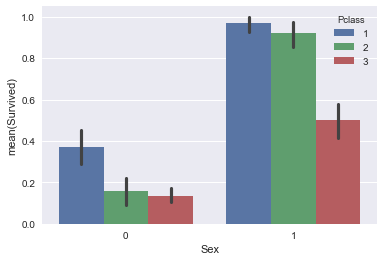

In [129]:
# 就两个明显因素对数据进行初步探索
sns.barplot(x="Sex", y="Survived", hue="Pclass",data = titanic_df)

从图中可以看到女性的平均生还率要高于男性，且仓位越高平均生还率越高。

## 数据处理

In [124]:
# 修正没有年龄的数据
average_age_of_passengers = titanic_df['Age'].mean()
titanic_df['Age'].fillna(average_age_of_passengers,inplace=True)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
# 根据年龄进行分组
def person_type(dataSet):
    age, sex = dataSet
    
    if age < 18:
        return 'child'
    elif age > 60:
        return 'elder'
    else:
        return 'adult'
    
titanic_df['Type']=titanic_df[['Age','Sex']].apply(person_type, axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [126]:
# 处理性别数据类型
titanic_df['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## 探索数据

### 1、探究年龄对生还率的影响

In [130]:
titanic_df.groupby('Survived').mean()['Age']

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

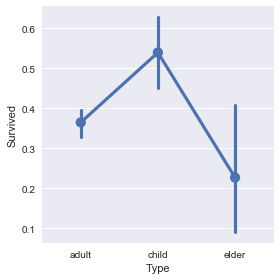

In [131]:
sns.factorplot('Type','Survived',data=titanic_df)

### 2、性别对生还率的影响

### 3、地位对生还率的影响

### 4、同行亲人人数对生还率的影响

### 5、登船港口对生还率的影响

***
参考资料  
[1]. [数据分析 - 泰坦尼克号生还分析](http://www.cnblogs.com/msdynax/p/6099814.html)  
[2]. 